In [ ]:
import warnings
from matplotlib import image
import numpy as np
import pandas as pd
from sklearn import cluster
from matplotlib import pyplot as plt
import imageio
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
import cv2
from sklearn.decomposition import PCA
warnings.filterwarnings("ignore")

# Initializing data

In [ ]:
mu , sigma = 0, 1 #Expectation,Variance
x = np.random.normal(mu,sigma,100)
y11 = np.random.normal(mu+1,sigma*10,50)
y22 = np.random.normal(mu-1,sigma*10,48)
y2 = np.concatenate((y22,[-100,-100])) #Adding outliers
y3 = np.concatenate((y11,y2))

In [ ]:
df = {'x':x,'y':y3}
df = pd.DataFrame.from_dict(df)
df

,x,y
0,-0.137443,-8.082060
1,-0.857238,4.511582
2,-2.459638,4.263330
3,-2.335910,6.082554
4,0.116152,-2.257277
...,...,...
95,-0.827021,1.380352
96,-1.256120,5.933279
97,-1.318143,-6.208678
98,-1.462102,-100.000000


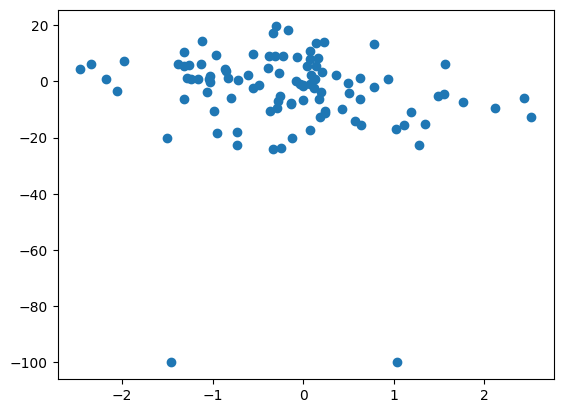

In [ ]:
plt.scatter(x,y3)
plt.show()

# K-means

In [ ]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df)

KMeans(n_clusters=2)

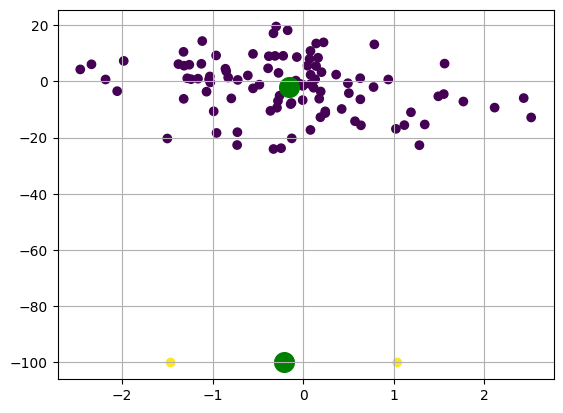

centers:  [[  -0.15996601   -1.89462066]
 [  -0.21168515 -100.        ]]


In [ ]:
plt.scatter(x,y3,c=kmeans.labels_,label=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='green')
plt.grid(True)
plt.show()
print("centers: ",kmeans.cluster_centers_)

### We can see the center of the outliers overfitted through them

# K-medoids

In [ ]:
kmedo = KMedoids(n_clusters = 2)
kmedo.fit(df)

KMedoids(n_clusters=2)

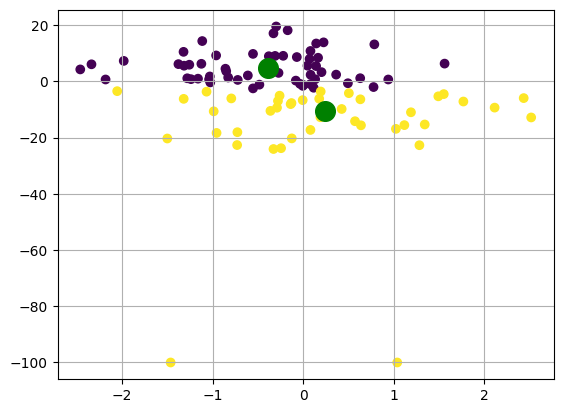

ceters:  [[ -0.38662921   4.66674207]
 [  0.24417169 -10.65646874]]


In [ ]:
plt.scatter(x,y3,c=kmedo.labels_,label=kmedo.labels_)
plt.scatter(kmedo.cluster_centers_[:,0],kmedo.cluster_centers_[:,1],s=200,c='green')
plt.grid(True)
plt.show()
print("ceters: ",kmedo.cluster_centers_)

### Not overfitted through the outliers

# Segmenting with kmeans

### Finding the k "mean colors" and matching any pixel to its closest center

In [ ]:
def segment_image_with_kmeans(img,num_colors):
  X = img.reshape((img.shape[0] * img.shape[1]), img.shape[2])
  kmeans = KMeans(n_clusters=num_colors, random_state=42).fit(X)
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  for row in range(len(X)):
      label = labels[row]
      centroid = centroids[label]
      X[row] = centroid
  image_segmented = X.reshape(np.roll(img.shape, 0)).transpose(0, 1, 2)
  return image_segmented

## Loading image (it's me from my trip to cuba)

In [ ]:
im = image.imread('Cuba.jpg')
im

array([[[252, 254, 251],
        [252, 254, 251],
        [252, 254, 251],
        ...,
        [115, 120,  62],
        [114, 119,  61],
        [113, 118,  60]],

       [[252, 254, 251],
        [252, 254, 251],
        [252, 254, 251],
        ...,
        [115, 120,  62],
        [114, 119,  61],
        [113, 118,  60]],

       [[252, 254, 251],
        [252, 254, 251],
        [252, 254, 251],
        ...,
        [115, 120,  62],
        [114, 119,  61],
        [114, 119,  61]],

       ...,

       [[ 82,  86,  87],
        [ 82,  86,  87],
        [ 82,  86,  87],
        ...,
        [129,  92,  65],
        [127,  90,  63],
        [126,  89,  62]],

       [[ 82,  86,  87],
        [ 82,  86,  87],
        [ 82,  86,  87],
        ...,
        [130,  93,  66],
        [128,  91,  64],
        [128,  91,  64]],

       [[ 82,  86,  87],
        [ 82,  86,  87],
        [ 82,  86,  87],
        ...,
        [129,  92,  65],
        [129,  92,  65],
        [128,  91,  64]]

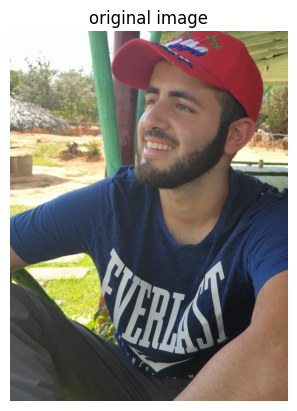

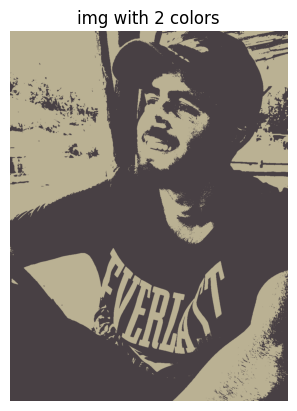

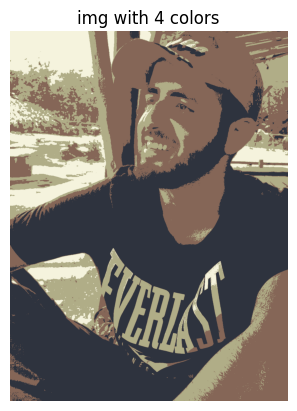

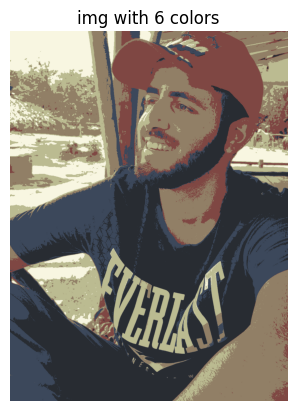

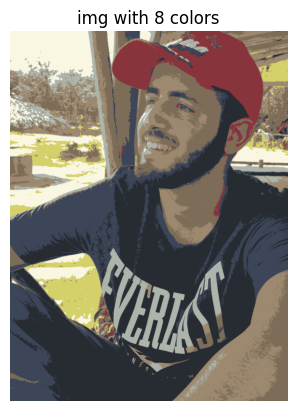

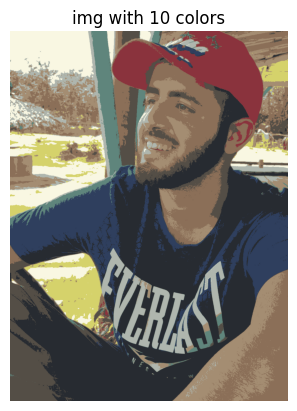

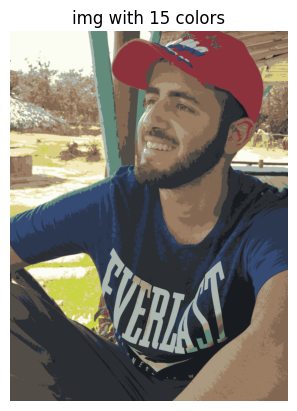

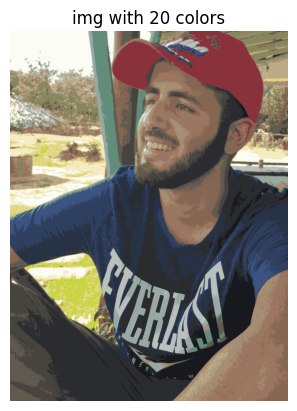

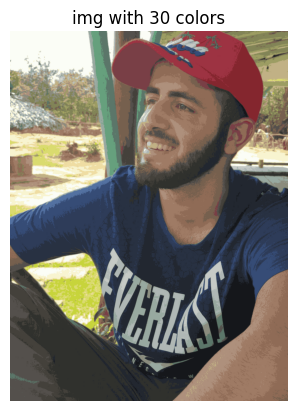

In [ ]:
plt.imshow(im)
plt.axis('off')
plt.title('original image')
plt.show()
for k in [2,4,6,8,10,15,20,30]:
    image = np.copy(im)
    new_image = segment_image_with_kmeans(image ,k)
    plt.imshow(new_image)
    plt.axis('off')
    plt.title('img with ' + str(k) + ' colors')
    plt.show()

In [ ]:
img = cv2.imread('Cuba.jpg')

In [ ]:
img.shape

(1440, 1080, 3)

### Splitting the image to the basic colors RGB

In [ ]:
blue,green,red = cv2.split(img)

(<matplotlib.image.AxesImage at 0x7f48d2cbabc0>, (1440, 1080))

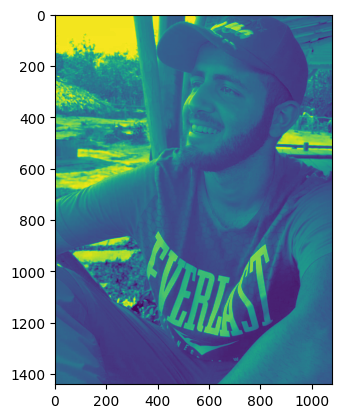

In [ ]:
plt.imshow(blue) , red.shape

# Defining the PCA to highest level

In [ ]:
pca = PCA(min(red.shape[0],red.shape[1]))
red_transformed = pca.fit_transform(red)
red_invert = pca.inverse_transform(red_transformed)
green_transformed = pca.fit_transform(green)
green_invert = pca.inverse_transform(green_transformed)
blue_transformed = pca.fit_transform(blue)
blue_invert = pca.inverse_transform(blue_transformed)

### Presenting the difference between components

Maximum components image (original image):


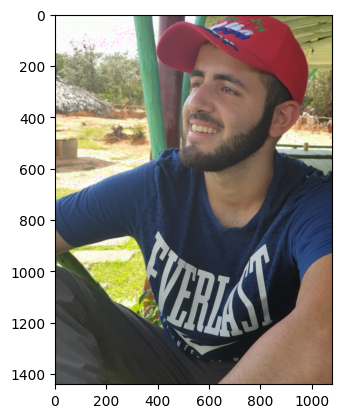

Image with  5  components:


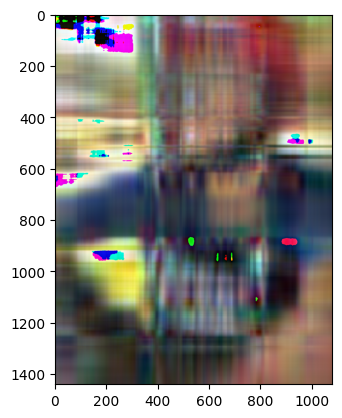

Image with  10  components:


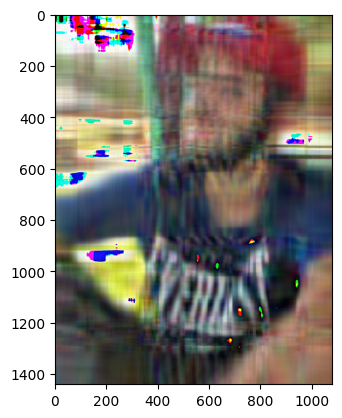

Image with  20  components:


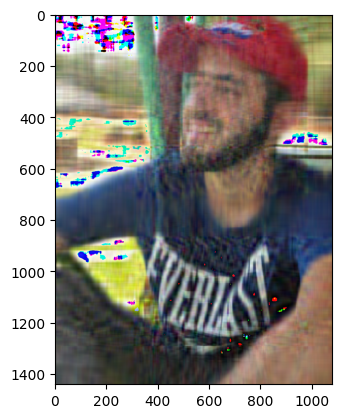

Image with  30  components:


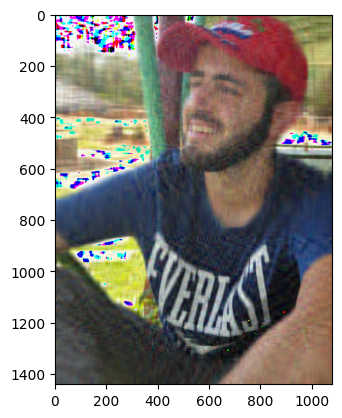

Image with  50  components:


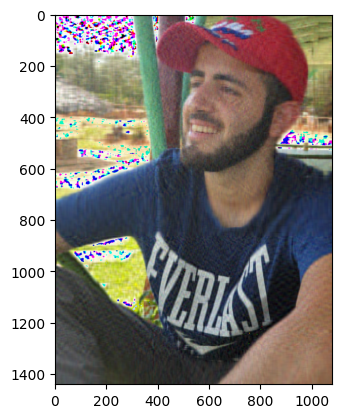

Image with  100  components:


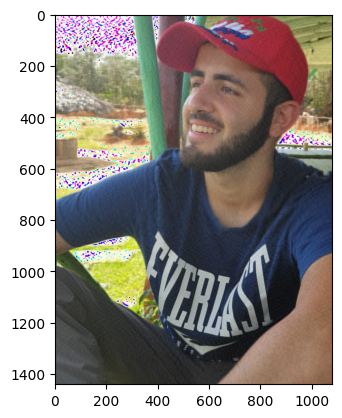

Image with  200  components:


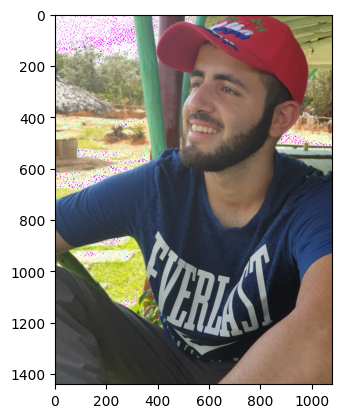

Image with  400  components:


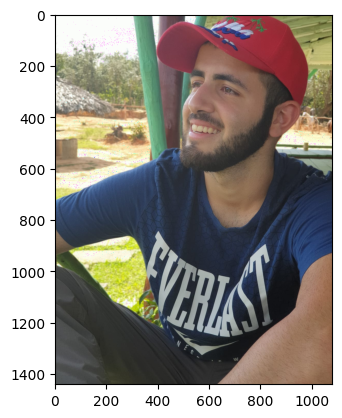

In [ ]:
print("Maximum components image (original image):")
img_stacked = (np.dstack((red_invert,green_invert,blue_invert))).astype(np.uint8)
plt.imshow(img_stacked)
plt.show()
for i in (5,10,20,30,50,100,200,400):
    pca = PCA(i)
    red_transformed = pca.fit_transform(red)
    red_invert = pca.inverse_transform(red_transformed)
    green_transformed = pca.fit_transform(green)
    green_invert = pca.inverse_transform(green_transformed)
    blue_transformed = pca.fit_transform(blue)
    blue_invert = pca.inverse_transform(blue_transformed)
    img_stacked = (np.dstack((red_invert,green_invert,blue_invert))).astype(np.uint8)
    print("Image with ",i," components:")
    plt.imshow(img_stacked)
    plt.show()